In [8]:
import tensorflow as tf

In [9]:
print(tf.__version__)

2.12.0


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
dataset=pd.read_csv("H:\DataSet_csv\churn_modeling\Churn_Modelling.csv")

In [13]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
x=dataset.iloc[:,3:-1]
y=dataset.iloc[:,-1]

In [23]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [22]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [29]:
# Feature engineering --- OneHotEncoding
geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x["Gender"],drop_first=True)

In [30]:
# concatenate these variable with dataframe--
x.drop(["Geography","Gender"],axis=1,inplace=True)

In [34]:
x=pd.concat([x,geography,gender],axis=1)

In [35]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
# Feature Scaling---

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [41]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [42]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

## Now Lets Create ANN

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [46]:
# Initalize the ANN
classifier=Sequential()

In [47]:
# Adding the input layer
classifier.add(Dense(units=11,activation="relu"))

In [48]:
# adding the first hidden layer
classifier.add(Dense(units=7,activation="relu"))

In [49]:
# adding the second hidden layer
classifier.add(Dense(units=6,activation="relu"))

In [50]:
# adding the output layer
classifier.add(Dense(1,activation="sigmoid"))  # Sigmoid here because it is a Binary Classification

In [51]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [66]:
# early stopping

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)


In [67]:
early_stopping

In [68]:
# Train our neural network
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3054 - accuracy: 0.8709 - val_loss: 0.3741 - val_accuracy: 0.8554
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3045 - accuracy: 0.8699 - val_loss: 0.3805 - val_accuracy: 0.8527
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3052 - accuracy: 0.8696 - val_loss: 0.3748 - val_accuracy: 0.8535
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3045 - accuracy: 0.8712 - val_loss: 0.3744 - val_accuracy: 0.8538
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3037 - accuracy: 0.8707 - val_loss: 0.3765 - val_accuracy: 0.8512
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3048 - accuracy: 0.8688 - val_loss: 0.3736 - val_accuracy: 0.8508
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3043 - accuracy: 0.8694 - val_loss: 0.3766 - val_accuracy:

In [69]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

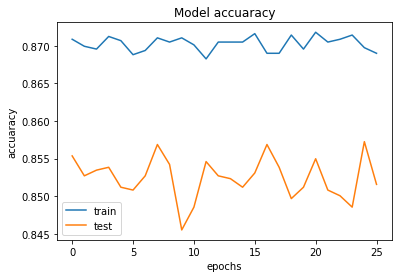

In [70]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model accuaracy")
plt.ylabel("accuaracy")
plt.xlabel("epochs")
plt.legend(['train',"test"])
plt.show()

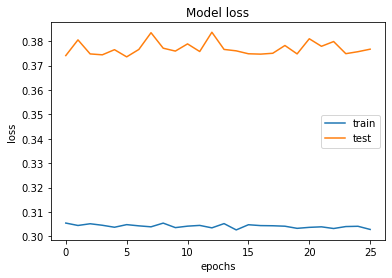

In [71]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(['train',"test"])
plt.show()

In [72]:
# prediction 
y_pred=classifier.predict(x_test)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[0.2160497 ],
       [0.3087811 ],
       [0.10916676],
       ...,
       [0.06259341],
       [0.34384054],
       [0.17061903]], dtype=float32)

In [77]:
# make confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [79]:
y_pred=(y_pred>=0.5)

In [84]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [89]:
x_test.shape

(2000, 11)

In [80]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1504,   91],
       [ 197,  208]], dtype=int64)

In [81]:
# calculate accuaracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [82]:
score

0.856

In [83]:
# get weihght
classifier.get_weights()

[array([[-0.22477704,  0.11544831,  0.26556116,  0.04199897, -0.6013908 ,
         -0.05949353, -0.1402685 ,  0.2767133 , -0.04422449, -0.27409282,
         -0.12414431],
        [ 0.69469535,  0.0631569 , -0.08168744, -0.5606482 , -0.84698904,
          0.55365455, -0.13543174, -0.19624108,  0.01183197, -0.28413776,
          1.0361398 ],
        [ 0.10312202, -0.36009005, -0.7503361 , -0.06417792,  0.63348126,
          0.11624977,  0.12927115,  0.15332758,  0.70984864, -0.00396736,
         -0.3044455 ],
        [-0.9053166 ,  1.0147371 ,  0.25150672, -0.43827373,  0.7757894 ,
          0.09719646,  0.11810262, -0.72351176, -1.1847609 ,  0.07421524,
          0.44896904],
        [-1.3788298 , -1.3425623 ,  0.12347635, -0.22997984,  0.06156566,
          1.4181861 , -0.2282582 , -0.5307892 ,  0.28272858, -0.02053083,
          0.17803499],
        [-0.10021999, -0.04381002,  0.4440376 , -0.675533  , -0.11166807,
          0.03331248,  0.01025437,  0.7773644 , -0.01833951, -0.0909816